TRANSFER LEARNING (GLOVE VECTOR)
RNN/LSTM BASED MODEL
STACKED LSTM MODEL

GET THE EMOJI PACKAGE

In [1]:
import emoji
#emoji.EMOJI_DATA

In [2]:
emoji_dictionary={
    "0":":\u2764\uFE0F:",
    "1":":baseball:",
    "2":":grinning_face_with_big_eyes:",
    "3":":disappointed_face:",
    "4":":fork_and_knife:",
    "5":":hundred_points:",
    "6":":fire:",
    "7":":face_blowing_a_kiss:",
    "8":":chestnut:",
    "9":":flexed_biceps:"
}

In [3]:
for e in emoji_dictionary.values():
    print(emoji.emojize(e))

:❤️:
⚾
😃
😞
🍴
💯
🔥
😘
🌰
💪


PROCESSING A CUSTOM DATASET

In [4]:
import pandas as pd
import numpy as np

In [5]:
train=pd.read_csv('train_emoji.csv')
test=pd.read_csv('test_emoji.csv')

In [6]:
X_train=train.iloc[:,0].values
Y_train=train.iloc[:,1].values

X_test=test.iloc[:,0].values
Y_test=test.iloc[:,1].values

In [7]:
for i in range(5):
    print(X_train[i],emoji.emojize(emoji_dictionary[str(Y_train[i])]))

I am proud of your achievements 😃
It is the worst day in my life 😞
Miss you so much :❤️:
food is life 🍴
I love you mum :❤️:


GLOVE VECTORS

In [8]:
f=open('glove.6B.50d.txt',encoding='utf-8') 

In [9]:
embedding_index={}
for line in f:
    values=line.split()
    word=values[0]
    coefs=np.asarray(values[1:],dtype='float')
    embedding_index[word]=coefs
f.close()

SENTENCE TO VECTORS

In [10]:
def embedding_output(X):
    #no.of rnn units=no.of maxlength of sentence
    maxLen=10
    embed_dim=50
    embedding_out=np.zeros((X.shape[0],maxLen,embed_dim))
    
    for i in range(X.shape[0]):
        #we need to iterate over words
        T=X
        T[i]=T[i].split()
        for j in range(len(X[i])):
            try:
                embedding_out[i][j]=embedding_index[T[i][j].lower()]
            except:
                embedding_out[i][j]=np.zeros((50,))
    return embedding_out

In [11]:
embedded_train=embedding_output(X_train)
embedded_test=embedding_output(X_test)

In [12]:
embedded_train.shape

(131, 10, 50)

In [13]:
embedded_test.shape

(55, 10, 50)

LSTM ARCHITECTURE

In [14]:
#each cell accepts the its corresponding cols of words and the vectors

In [15]:
from keras.layers import *
from keras import models

In [16]:
model=models.Sequential()
#model.add(LSTM(64,input_shape=(10,50))) for simple models 
#for complex lstm models we will return sequences
model.add(LSTM(64,input_shape=(10,50),return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            29440     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 63,114
Trainable params: 63,114
Non-traina

In [17]:
#convert Y_train into one hot vectors
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)
Y_test=to_categorical(Y_test,num_classes=10)

In [18]:
from keras.callbacks import EarlyStopping
earlystop=EarlyStopping(monitor='val_accuracy',patience =10)
hist=model.fit(embedded_train,Y_train,epochs=100,batch_size=64,shuffle=True,validation_split=0.2)


Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 2.3209 - accuracy: 0.1250 - val_loss: 2.2389 - val_accuracy: 0.4074
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 2.2395 - accuracy: 0.1923 - val_loss: 2.1777 - val_accuracy: 0.2222
Epoch 3/100
2/2 [==============================] - 0s 46ms/step - loss: 2.1494 - accuracy: 0.2981 - val_loss: 2.1170 - val_accuracy: 0.2593
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 2.0452 - accuracy: 0.4231 - val_loss: 2.0530 - val_accuracy: 0.2963
Epoch 5/100
2/2 [==============================] - 0s 41ms/step - loss: 1.9425 - accuracy: 0.3173 - val_loss: 1.9945 - val_accuracy: 0.2222
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 1.8770 - accuracy: 0.3462 - val_loss: 1.9597 - val_accuracy: 0.2222
Epoch 7/100
2/2 [==============================] - 0s 41ms/step - loss: 1.7338 - accuracy: 0.3558 - val_loss: 1.9568 - val_accuracy: 0.2222
Epoch 8/100
2/2 [=====

2/2 [==============================] - 0s 38ms/step - loss: 0.1372 - accuracy: 0.9615 - val_loss: 0.9152 - val_accuracy: 0.7037
Epoch 60/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1690 - accuracy: 0.9519 - val_loss: 0.7105 - val_accuracy: 0.7407
Epoch 61/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1496 - accuracy: 0.9712 - val_loss: 0.9567 - val_accuracy: 0.6296
Epoch 62/100
2/2 [==============================] - 0s 36ms/step - loss: 0.1423 - accuracy: 0.9615 - val_loss: 1.0101 - val_accuracy: 0.6667
Epoch 63/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1259 - accuracy: 0.9712 - val_loss: 0.9338 - val_accuracy: 0.7037
Epoch 64/100
2/2 [==============================] - 0s 37ms/step - loss: 0.1088 - accuracy: 0.9712 - val_loss: 0.9532 - val_accuracy: 0.6667
Epoch 65/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0877 - accuracy: 0.9904 - val_loss: 1.0356 - val_accuracy: 0.6296
Epoch 66/100
2/2 [========

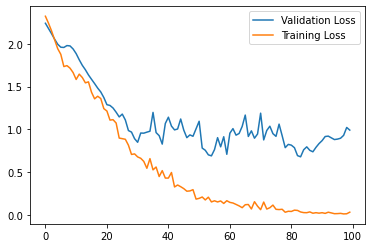

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['val_loss'],label="Validation Loss")
plt.plot(hist.history['loss'],label="Training Loss")
plt.legend()
plt.show()

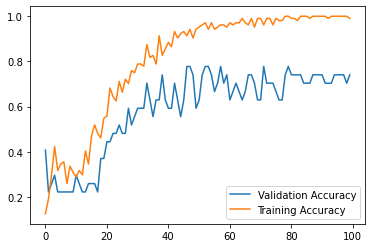

In [20]:
plt.plot(hist.history['val_accuracy'],label="Validation Accuracy")
plt.plot(hist.history['accuracy'],label="Training Accuracy")
plt.legend()
plt.show()

In [21]:
model.evaluate(embedded_test,Y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.9492 - accuracy: 0.8000


[0.9491589069366455, 0.800000011920929]

In [22]:
#75%accuracy on the simple lstm model
#79% accuracy on the bit complex lstm model

PRINT EMOJI

In [23]:
pred=model.predict(embedded_test)

2/2 [==============================] - 1s 5ms/step


In [24]:
for i in range(20,40):
    print(' '.join(X_test[i]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(Y_test[i]))]))
    print(emoji.emojize(emoji_dictionary[str(np.argmax(pred[i]))]))

you brighten my day
😃
:❤️:
I boiled rice
🍴
🍴
she is a bully
😞
😃
Why are you feeling bad
😞
😞
I am upset
😞
😞
give me the ball
⚾
⚾
My grandmother is the love of my life
:❤️:
:❤️:
enjoy your game
⚾
⚾
valentine day is near
😃
😃
I miss you so much
:❤️:
:❤️:
throw the ball
⚾
⚾
My life is so boring
😞
😞
she said yes
😃
😃
will you be my valentine
😃
:❤️:
he can pitch really well
⚾
⚾
dance with me
😃
😃
I am hungry
🍴
🍴
See you at the restaurant
🍴
⚾
I like to laugh
😃
😃
I will run
⚾
⚾


# DETAILS WE NEED IN DJANGO

In [26]:
with open("model.json",'w') as file:
    file.write(model.to_json())
model.save_weights('model.h5')

In [27]:
from keras.models import model_from_json

In [28]:
with open("model.json",'r') as file:
    model=model_from_json(file.read())
model.load_weights('model.h5')